# LOGBOOK: Impact Source Localization On Planar and Curved Robotic Surfaces Agnostic of the Sensor Positions

## Author: Sarah Aguasvivas Manzano
### September 2018

The goal of this project is continue to develop an algorithm to localize the source of an impact based on embedded piezoelectric sensors. We intend to provide a general method that can be applied to any kind of surface and any kind of material.

### STEP 1:

The first step that I tried is to characterize the signal depending on the response of two piezoelectric sensors 


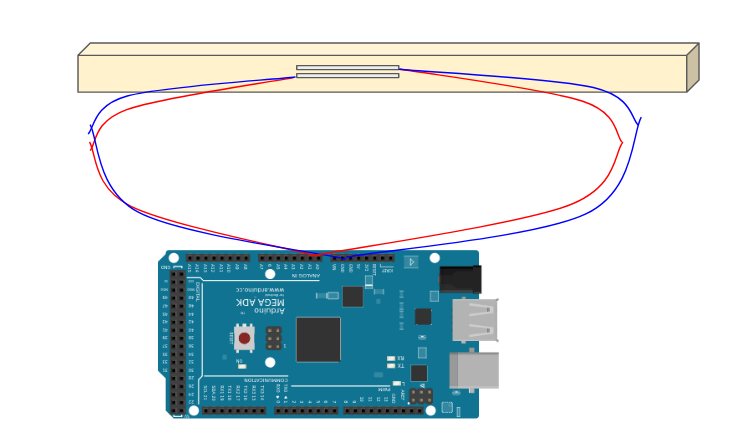

In [18]:
from IPython.display import Image
Image(filename='img/FirstSetup.png', width= 500)

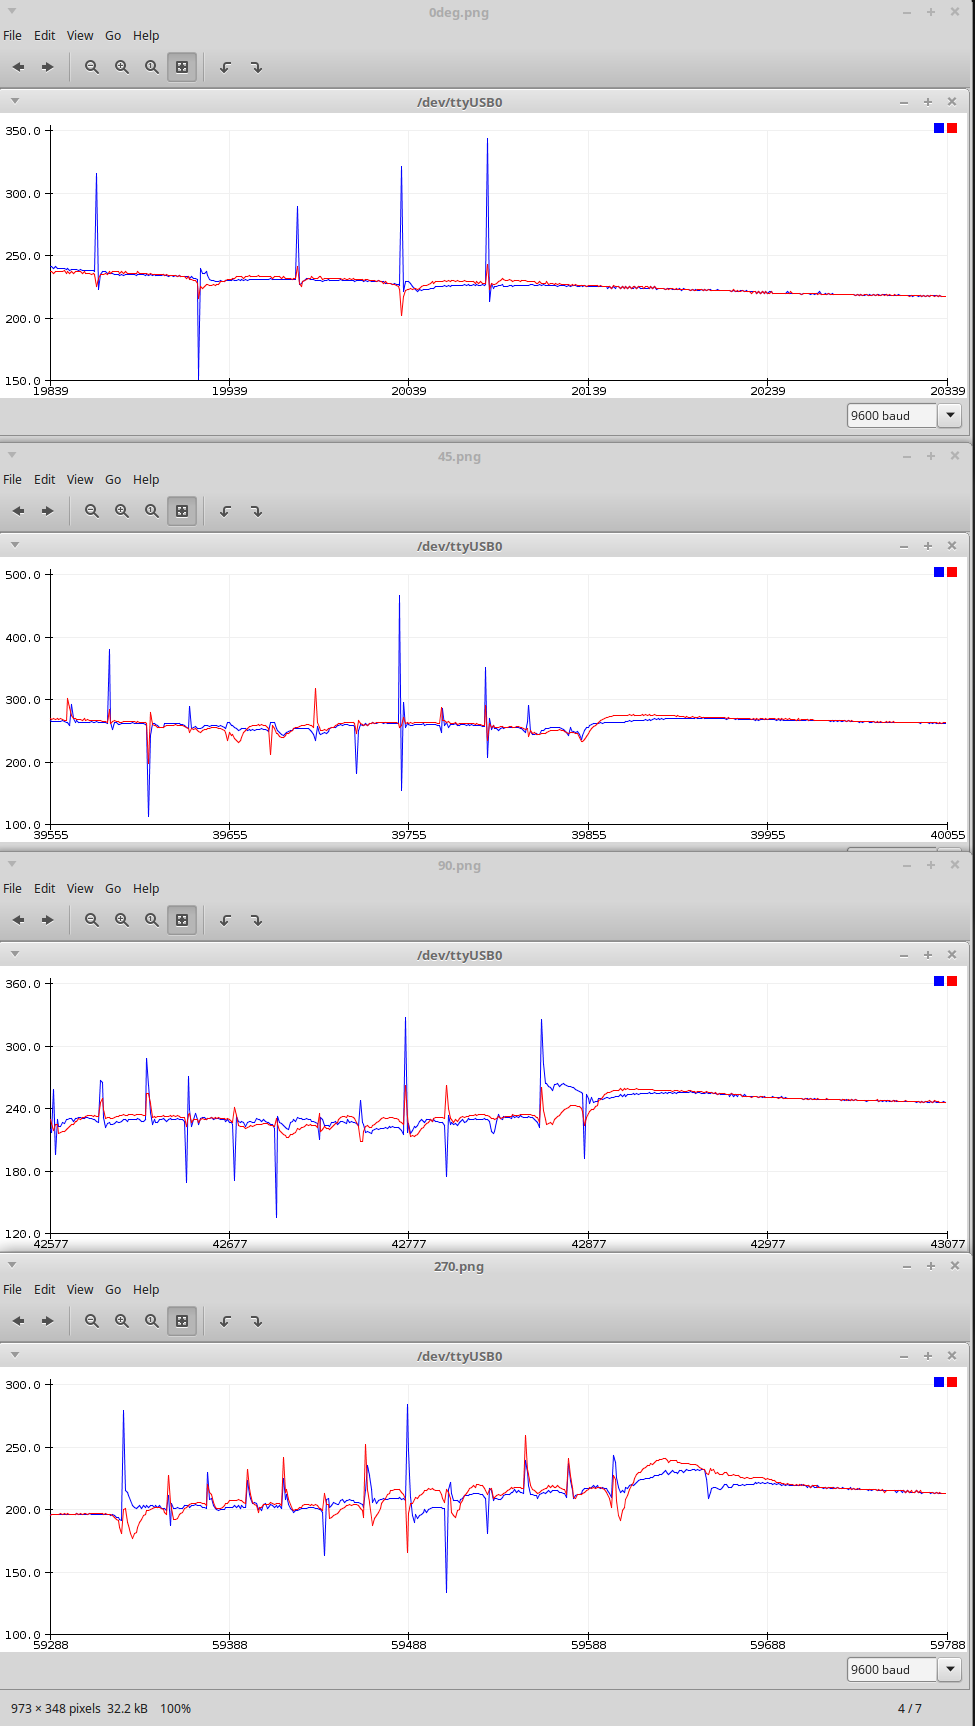

In [19]:
Image(filename='img/signalsFirst.png', width= 400)

## Second Attempt

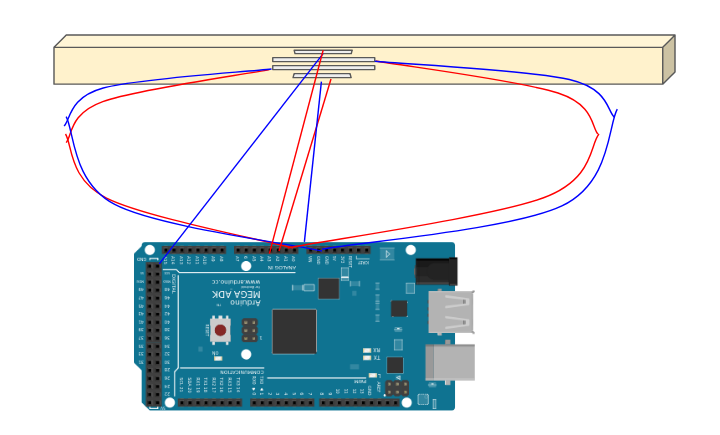

In [20]:
Image(filename='img/SecondAttempt.png', width= 500)

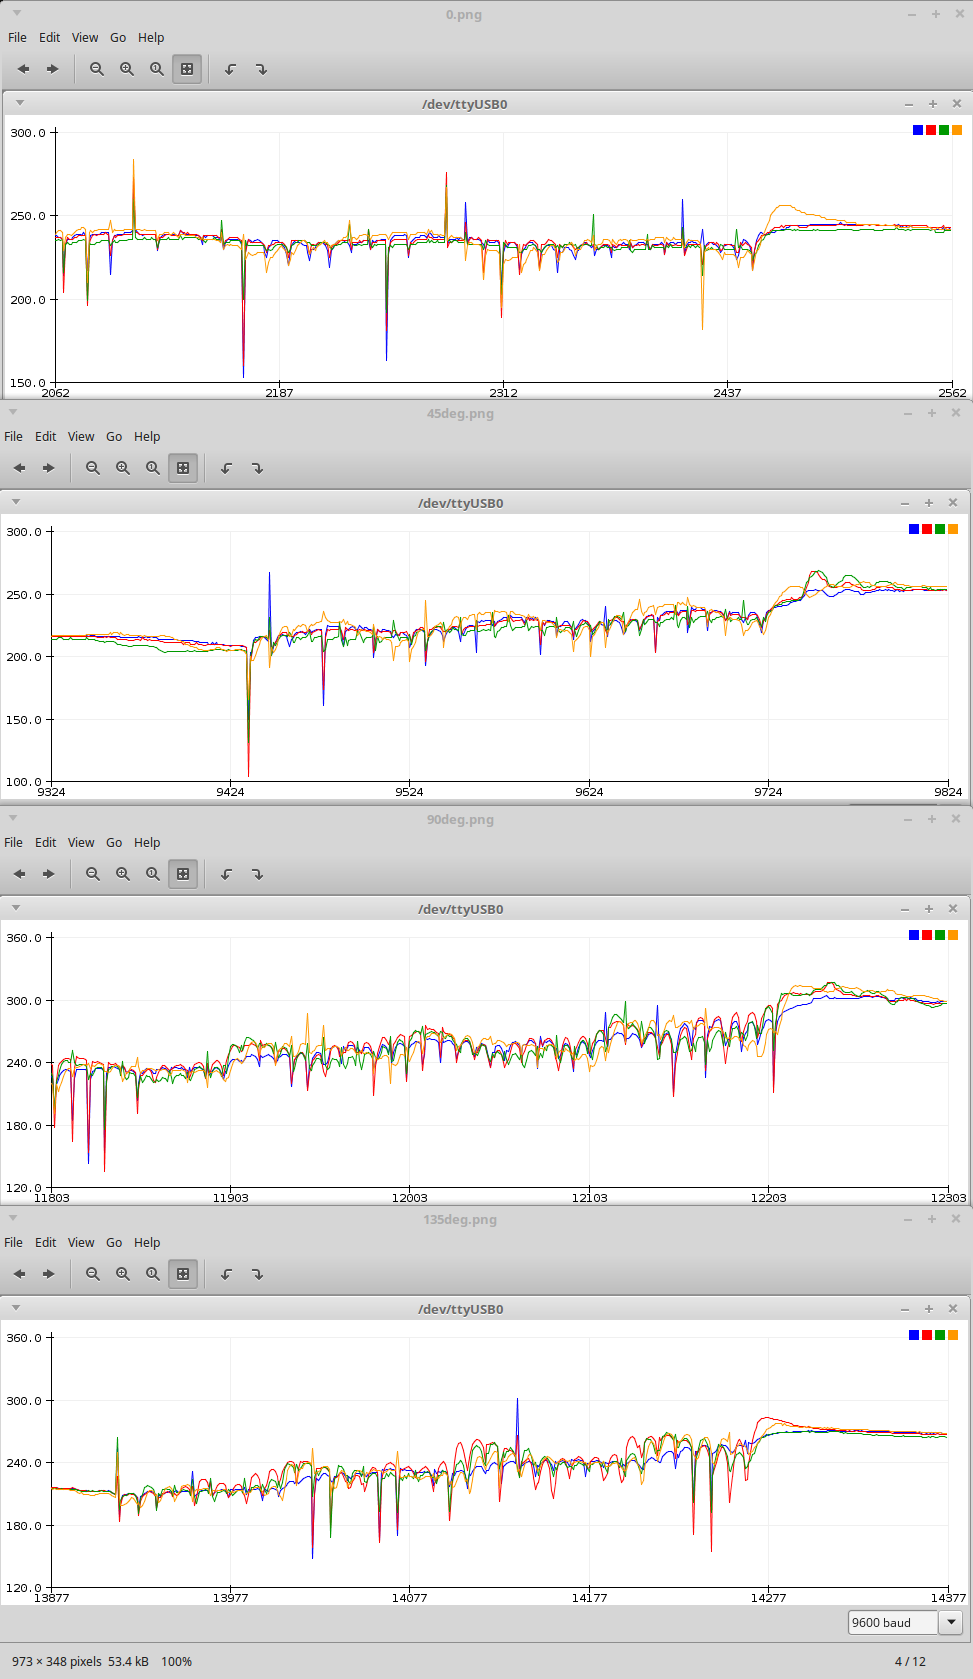

In [21]:
Image(filename='img/0-135.png', width= 300)

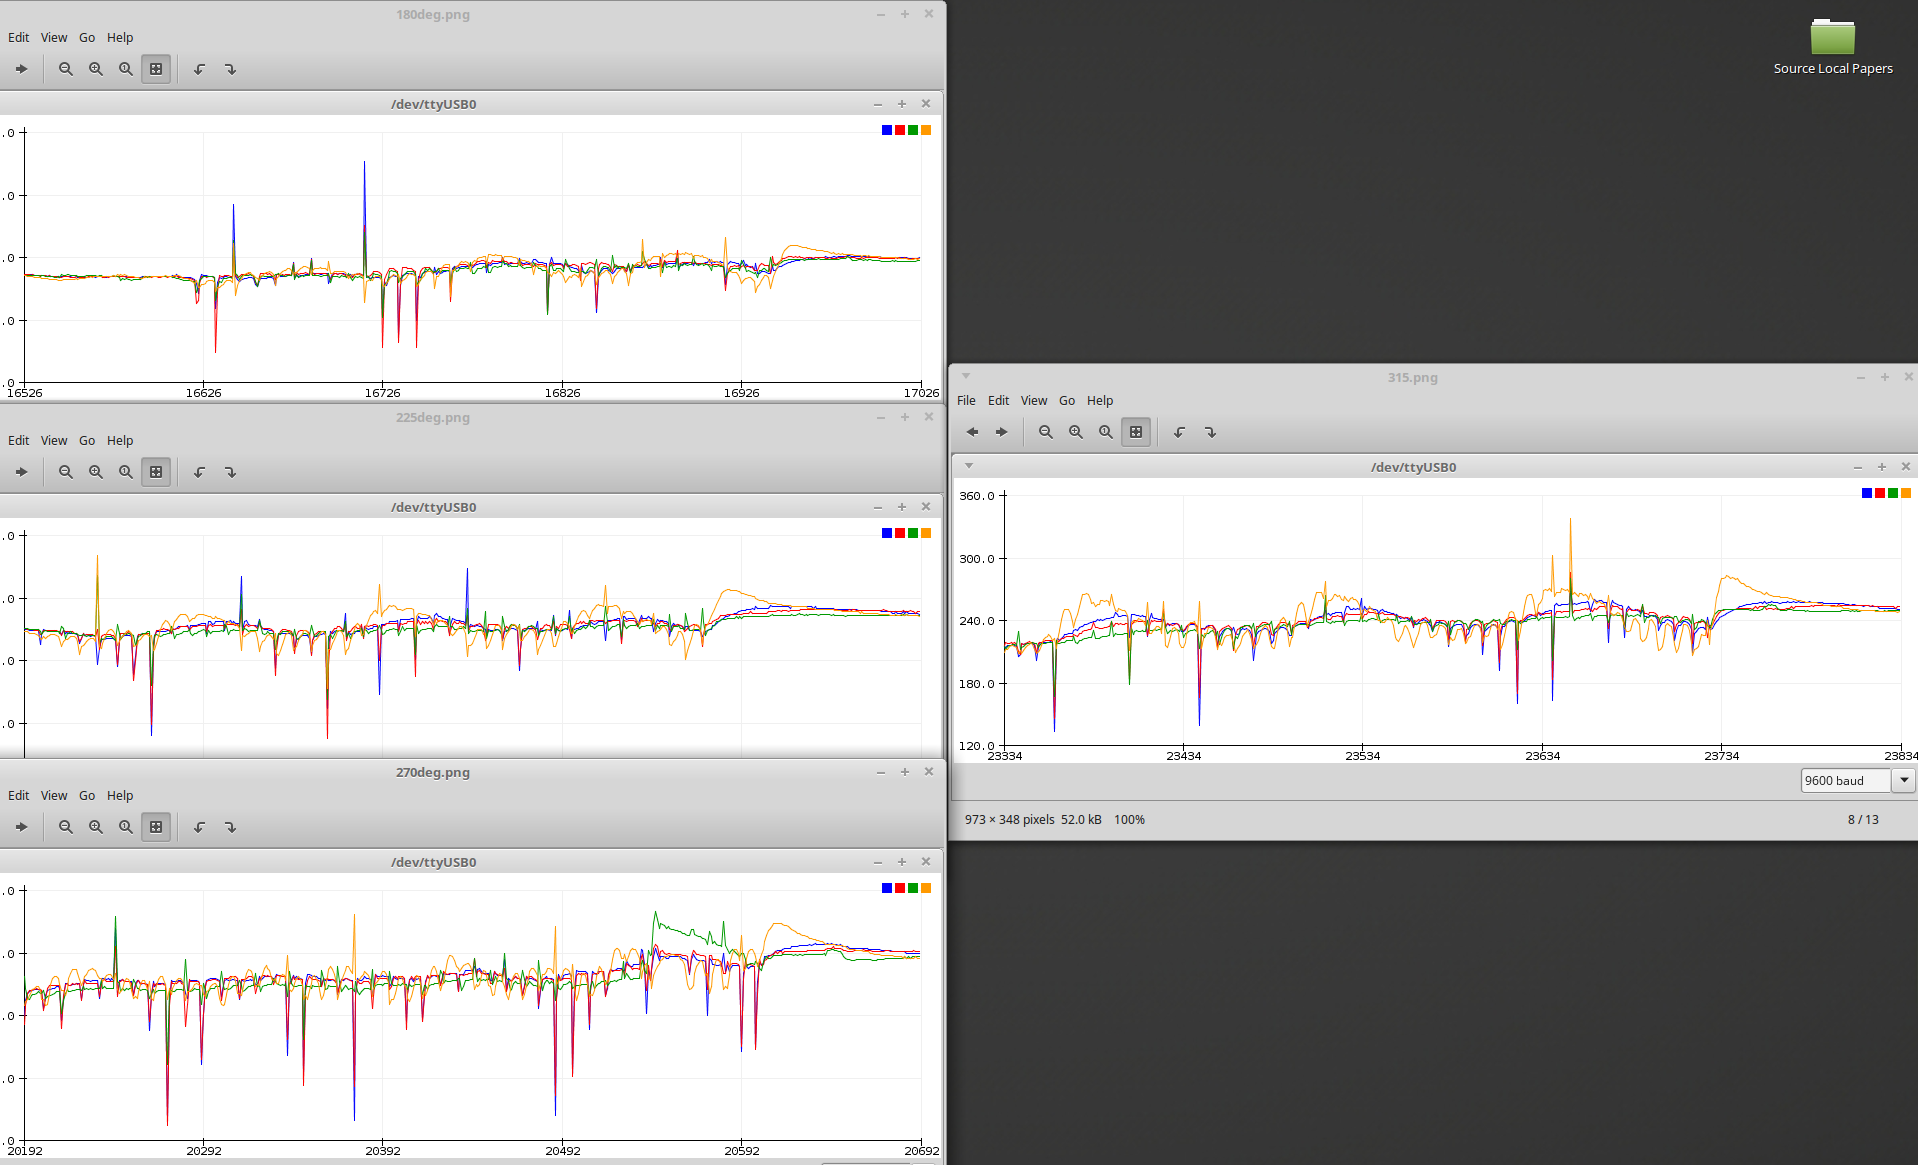

In [22]:
Image(filename='img/180-315.png', width= 500)

**Question: Are 2 sensors enough to characterize the angle between the point and the impact or do we need 4?**

**How I will answer:** Rolling window (not event based window) + event detection + neural network

#### PLAN: How many sensors?

- Stick two sensors together
- Keep track of order of sensors with respect to the material 
- Gather Data from Arduino MEGA
- Train neural network with rolling window and see if the test MSE is good enough
- If it is not good enough, try 4 and see again
- Conclusions will happen next
- Measure sampling rate from ESP with 2 and 4 sensors

When collecting data from esp, make sure to zero the data around a positive integer. Bias?

### Training First Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
#import loadingData1

In [24]:
deg40p1= pd.read_csv('junkCodes/40deg1.txt', sep=" ", header= None)
deg40p1 = deg40p1.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': ''}, regex=True)

deg40p5= pd.read_csv('junkCodes/40deg5.txt', sep=" ", header= None)
deg40p5 = deg40p5.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': ''}, regex=True)

deg40p10= pd.read_csv('junkCodes/40deg10.txt', sep=" ", header= None)
deg40p10 = deg40p10.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': ''}, regex=True)

deg40p20= pd.read_csv('junkCodes/40deg20.txt', sep=" ", header= None)
deg40p20 = deg40p20.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fe': ''}, regex=True)

deg90p15= pd.read_csv('junkCodes/90deg15.txt', sep=" ", header= None)
deg90p15 = deg90p15.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fe': ''}, regex=True)

deg220p10= pd.read_csv('junkCodes/220deg10.txt', sep=" ", header= None)
deg220p10 = deg220p10.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fa': ''
                             , r'e': ''}, regex=True)

deg320p25= pd.read_csv('junkCodes/320deg25.txt', sep=" ", header= None)
deg320p25 = deg320p25.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fa': ''
                             , r'e': '', r'f': ''}, regex=True)

deg150p20= pd.read_csv('junkCodes/150deg20.txt', sep=" ", header= None)
deg150p20 = deg150p20.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fa': ''
                             , r'e': '', r'f': ''}, regex=True)


deg40p1= deg40p1.values
deg40p10= deg40p10.values
deg40p5= deg40p5.values
deg40p20= deg40p20.values
deg90p15= deg90p15.values
deg220p10= deg220p10.values
deg320p25= deg320p25.values
deg150p20 = deg150p20.values

deg40point1= []
deg40point10 = []
deg40point5 = []
deg40point20 = []
deg90point15 = []
deg220point10 = []
deg320point25= []
deg150point20= []

for i in range(deg40p1.shape[1]):
        if deg40p1[0][i]!="":
            deg40point1 += [int(deg40p1[0][i])]

for i in range(deg40p10.shape[1]):
        if deg40p10[0][i]!="":
            deg40point10 += [int(deg40p10[0][i])]
            
for i in range(deg40p5.shape[1]):
        if deg40p5[0][i]!="":
            deg40point5 += [int(deg40p5[0][i])]

for i in range(deg40p20.shape[1]):
        if deg40p20[0][i]!="":
            deg40point20 += [int(deg40p20[0][i])]

for i in range(deg90p15.shape[1]):
        if deg90p15[0][i]!="":
            deg90point15 += [int(deg90p15[0][i])]
            
for i in range(deg220p10.shape[1]):
        if deg220p10[0][i]!="":
            deg220point10 += [int(deg220p10[0][i])]
            
for i in range(deg320p25.shape[1]):
        if deg320p25[0][i]!="":
            deg320point25 += [int(deg320p25[0][i])]
            
for i in range(deg150p20.shape[1]):
        if deg150p20[0][i]!="":
            deg150point20+= [int(deg150p20[0][i])]
            
deg40point1= np.reshape(deg40point1, (-1,2))
deg40point10= np.reshape(deg40point10, (-1,2))
deg40point5= np.reshape(deg40point5, (-1,2))
deg40point20= np.reshape(deg40point20, (-1,2))
deg90point15= np.reshape(deg90point15, (-1,2))
deg220point10= np.reshape(deg220point10, (-1,2))
deg320point25= np.reshape(deg320point25, (-1,2))
deg150point20= np.reshape(deg150point20, (-1,2))

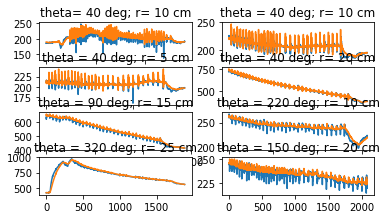

In [25]:

plt.subplot(5,2,1)
plt.plot(deg40point1[1000:-1])
plt.title('theta= 40 deg; r= 10 cm')
plt.subplot(5,2,2)
plt.plot(deg40point10[1000:-1])
plt.title('theta = 40 deg; r= 10 cm')
plt.subplot(5,2,3)
plt.plot(deg40point5[1000:-1])
plt.title('theta = 40 deg; r= 5 cm')
plt.subplot(5,2,4)
plt.plot(deg40point20[1000:-1])
plt.title('theta = 40 deg; r= 20 cm')
plt.subplot(5,2,5)
plt.plot(deg90point15[1000:-1])
plt.title('theta = 90 deg; r= 15 cm')
plt.subplot(5,2,6)
plt.plot(deg220point10[1000:-1])
plt.title('theta = 220 deg; r= 10 cm')
plt.subplot(5,2,7)
plt.plot(deg320point25[1000:-1])
plt.title('theta = 320 deg; r= 25 cm')
plt.subplot(5,2,8)
plt.plot(deg150point20[1000:-200])
plt.title('theta = 150 deg; r= 20 cm')

plt.show()


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


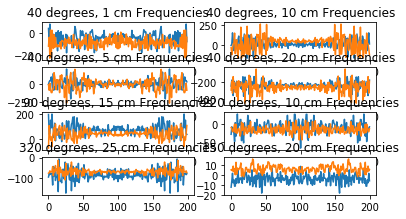

In [28]:
# Performing an nFFT in the whole data

fromPoint= 300
toPoint= 600

FS1 = np.fft.fft(deg40point1[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point1[fromPoint:toPoint, 1])

plt.subplot(5,2,1)
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])

plt.title('40 degrees, 1 cm Frequencies')


plt.subplot(5,2,2)
FS1 = np.fft.fft(deg40point10[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point10[fromPoint:toPoint, 1])

plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])
plt.title('40 degrees, 10 cm Frequencies')


plt.subplot(5,2,3)
FS1 = np.fft.fft(deg40point5[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point5[fromPoint:toPoint, 1])
plt.title('40 degrees, 5 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,4)
FS1 = np.fft.fft(deg40point20[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point20[fromPoint:toPoint, 1])
plt.title('40 degrees, 20 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,5)
FS1 = np.fft.fft(deg90point15[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg90point15[fromPoint:toPoint, 1])
plt.title('90 degrees, 15 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,6)
FS1 = np.fft.fft(deg220point10[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg220point10[fromPoint:toPoint, 1])
plt.title('220 degrees, 10 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,7)
FS1 = np.fft.fft(deg320point25[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg320point25[fromPoint:toPoint, 1])
plt.title('320 degrees, 25 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,8)
FS1 = np.fft.fft(deg150point20[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg150point20[fromPoint:toPoint, 1])
plt.title('150 degrees, 20 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])
plt.show()


In [106]:
#Nah, Wavelet decomposition in C p595 pdf731 Numerical Recipes in C
"""
from scipy import signal

t= np.linspace(-1, 1, len(deg40point1[:, 0]), endpoint=False)
widths = np.arange(1, 31)

cwtmatr = signal.cwt(deg40point1[:, 0], signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.title('Wavelet Decomposed Signal for Sensor 1')
plt.show()
"""

"\nfrom scipy import signal\n\nt= np.linspace(-1, 1, len(deg40point1[:, 0]), endpoint=False)\nwidths = np.arange(1, 31)\n\ncwtmatr = signal.cwt(deg40point1[:, 0], signal.ricker, widths)\nplt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',\n            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())\nplt.colorbar()\nplt.title('Wavelet Decomposed Signal for Sensor 1')\nplt.show()\n"

In [107]:
"""
t= np.linspace(-1, 1, len(deg40point1[:, 1]), endpoint=False)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(deg40point1[:, 1], signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.title('Wavelet Decomposed Signal for Sensor 2')
plt.show()
"""

"\nt= np.linspace(-1, 1, len(deg40point1[:, 1]), endpoint=False)\nwidths = np.arange(1, 31)\ncwtmatr = signal.cwt(deg40point1[:, 1], signal.ricker, widths)\nplt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',\n            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())\nplt.colorbar()\nplt.title('Wavelet Decomposed Signal for Sensor 2')\nplt.show()\n"

In [105]:

"""
# Get cross correlation between the signals. 
buffer=320

mode= 'full'
plt.figure()
delT1= signal.fftconvolve(deg40point1[500:500+buffer, 0], deg40point1[500:500+buffer, 1], mode)
delT2= signal.fftconvolve(deg40point5[500:500+buffer, 0], deg40point5[500:500+buffer, 1], mode)
delT3= signal.fftconvolve(deg40point10[500:500+buffer, 0], deg40point10[500:500+buffer, 1], mode)
delT4= signal.fftconvolve(deg40point20[500:500+buffer, 0], deg40point20[500:500+buffer, 1], mode)

delTT1= signal.fftconvolve(deg90point15[500:500+buffer, 0], deg90point15[500:500+buffer, 1], mode)
delTT2= signal.fftconvolve(deg220point10[500:500+buffer, 0], deg220point10[500:500+buffer, 1], mode)
delTT3= signal.fftconvolve(deg320point25[500:500+buffer, 0], deg320point25[500:500+buffer, 1], mode)
delTT4= signal.fftconvolve(deg150point20[500:500+buffer, 0], deg150point20[500:500+buffer, 1], mode)

plt.plot(delT1, label= '40 deg, 1 cm')
plt.plot(delT2, label='40 deg 5 cm')
plt.plot(delT3, label='40 deg 10 cm')

plt.plot(delTT1, label='90 deg 15 cm')
plt.plot(delTT2, label='220 deg 10 cm')
plt.plot(delT4, label='40 deg 20 cm')
plt.plot(delTT3, label='320 deg 25 cm')
plt.plot(delTT4, label='150 deg 20 cm')

plt.plot()
plt.legend()
"""

"\n# Get cross correlation between the signals. \nbuffer=320\n\nmode= 'full'\nplt.figure()\ndelT1= signal.fftconvolve(deg40point1[500:500+buffer, 0], deg40point1[500:500+buffer, 1], mode)\ndelT2= signal.fftconvolve(deg40point5[500:500+buffer, 0], deg40point5[500:500+buffer, 1], mode)\ndelT3= signal.fftconvolve(deg40point10[500:500+buffer, 0], deg40point10[500:500+buffer, 1], mode)\ndelT4= signal.fftconvolve(deg40point20[500:500+buffer, 0], deg40point20[500:500+buffer, 1], mode)\n\ndelTT1= signal.fftconvolve(deg90point15[500:500+buffer, 0], deg90point15[500:500+buffer, 1], mode)\ndelTT2= signal.fftconvolve(deg220point10[500:500+buffer, 0], deg220point10[500:500+buffer, 1], mode)\ndelTT3= signal.fftconvolve(deg320point25[500:500+buffer, 0], deg320point25[500:500+buffer, 1], mode)\ndelTT4= signal.fftconvolve(deg150point20[500:500+buffer, 0], deg150point20[500:500+buffer, 1], mode)\n\nplt.plot(delT1, label= '40 deg, 1 cm')\nplt.plot(delT2, label='40 deg 5 cm')\nplt.plot(delT3, label='40 de

# Update October 26th: New Data

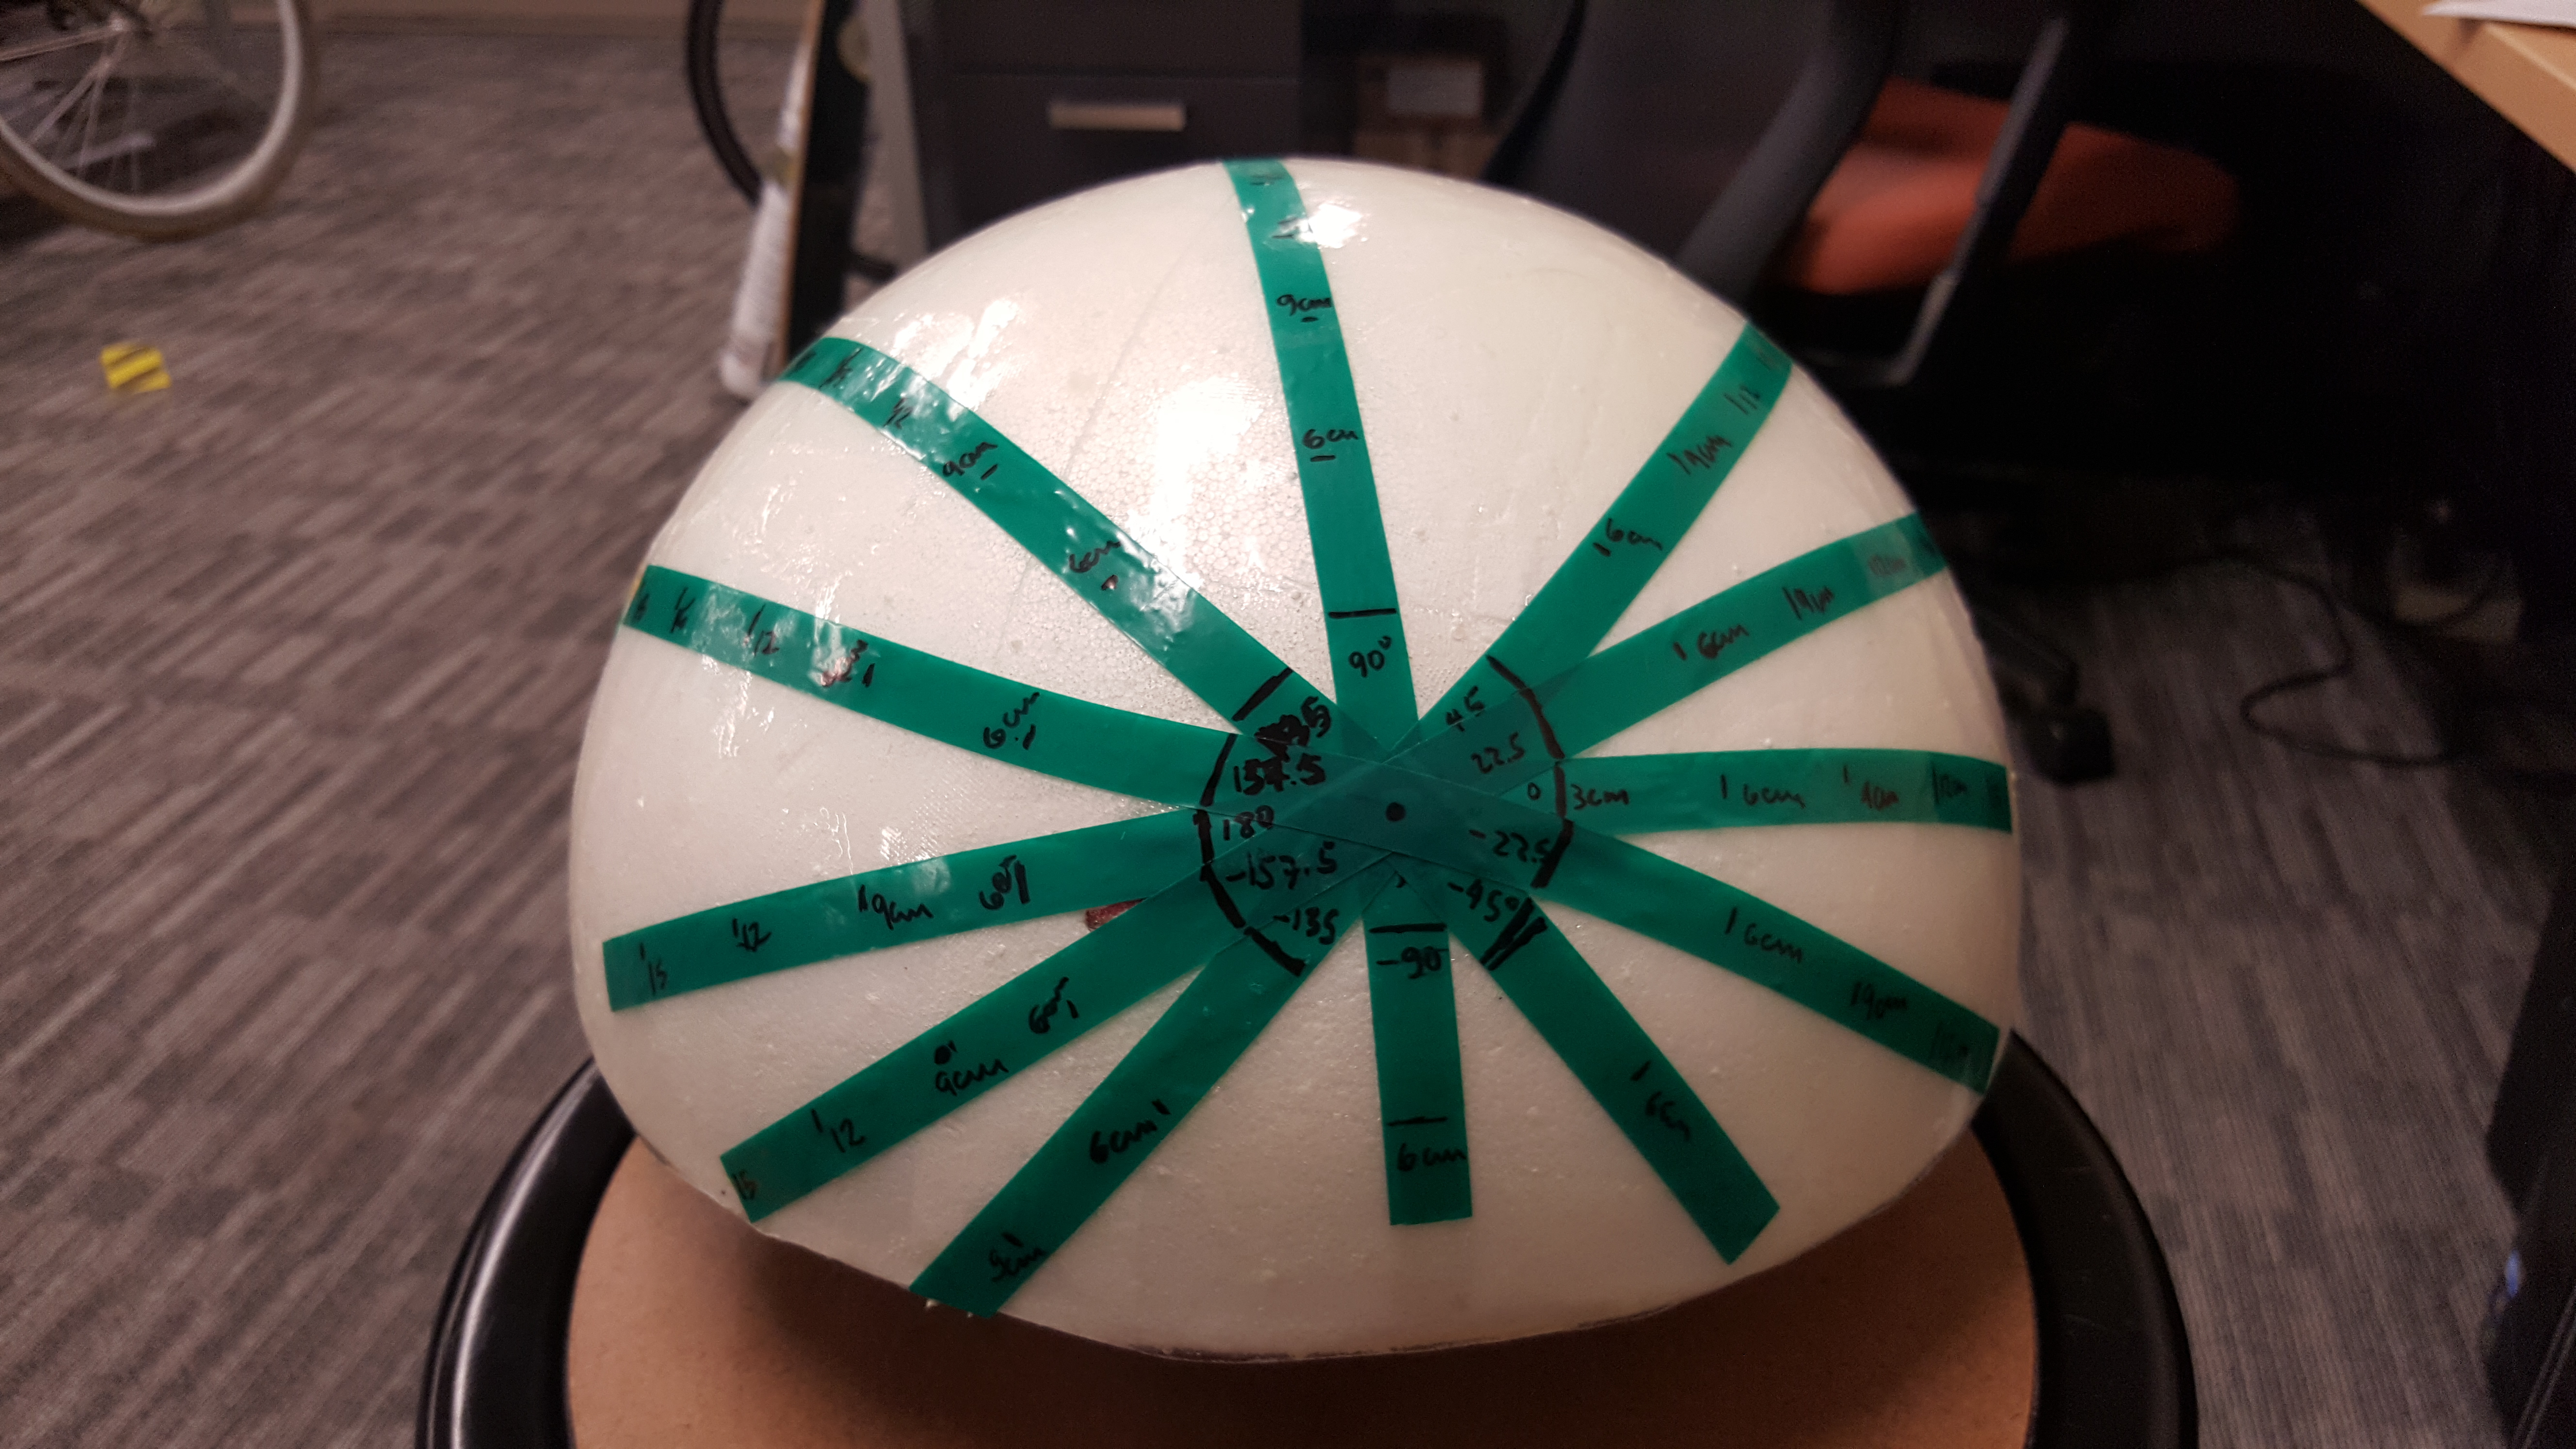

In [29]:
Image(filename='img/ball.jpg', width= 500)

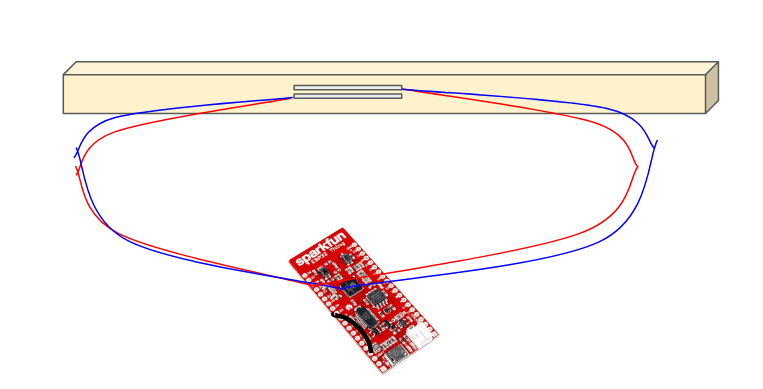

In [30]:
Image(filename='img/espschematic.png', width= 500)

In [11]:
from scipy.signal import find_peaks_cwt

[117.36883241]


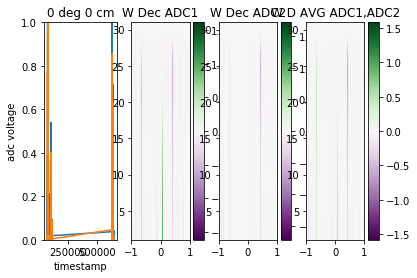

[0.93928361]


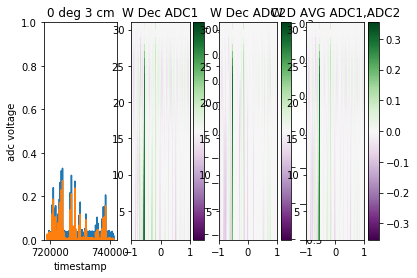

[0.21544063]


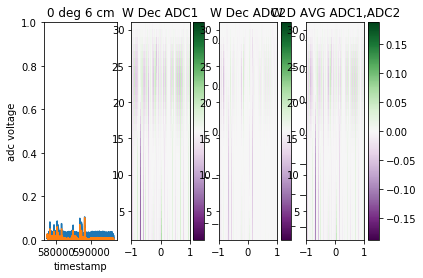

[0.27005869]


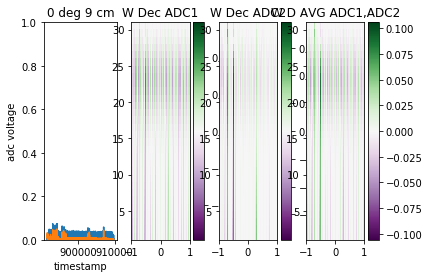

[0.13148266]


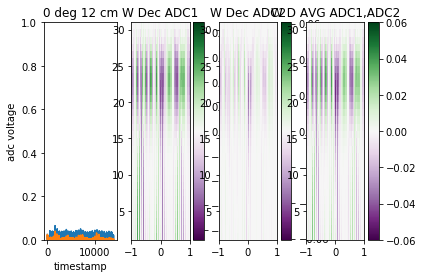

[0.11448509]


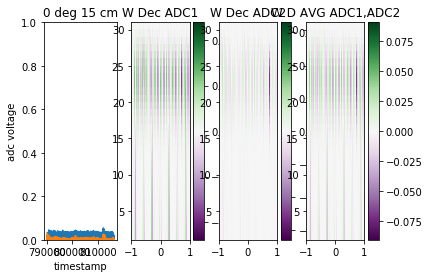

[0.13120353]


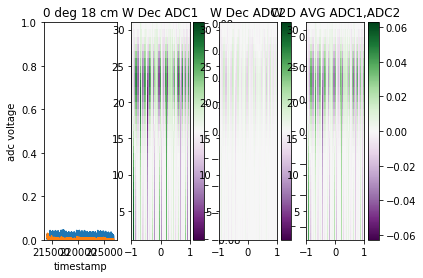

[1.34613013]


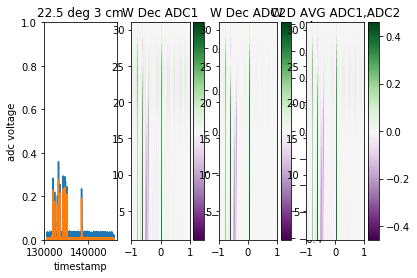

[0.29707587]


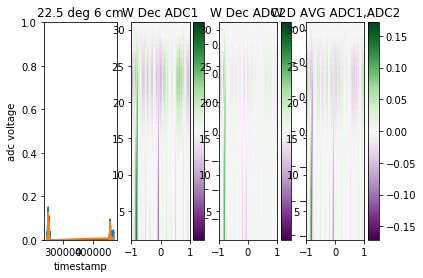

[0.12346733]


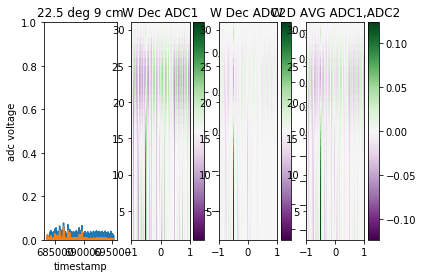

[0.08988374]


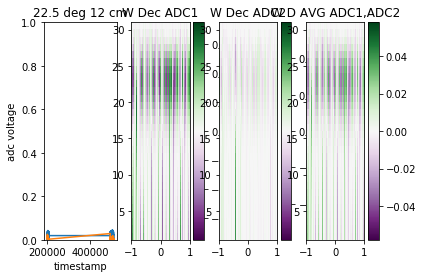

[0.08100516]


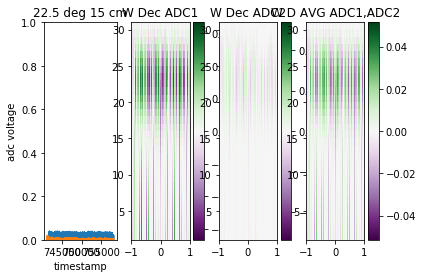

[0.08119601]


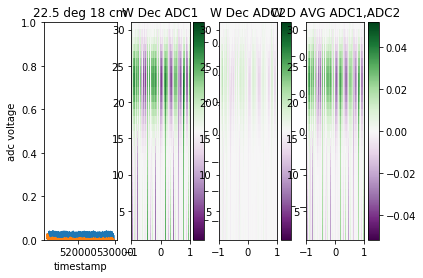

[0.12842131]


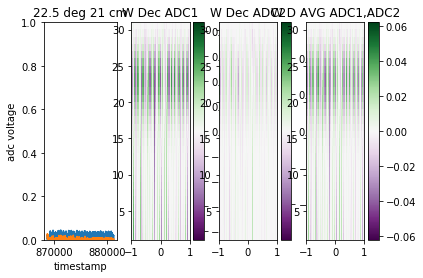

[0.12691891]


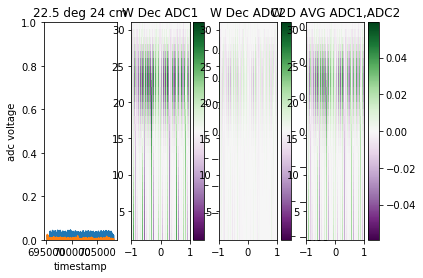

[0.09467632]


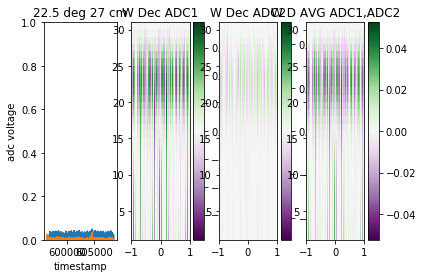

[0.54809964]


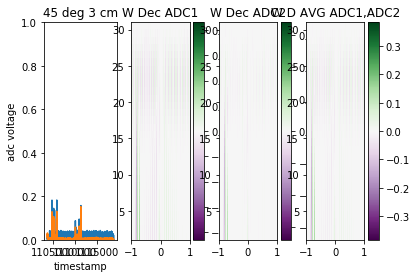

[0.1462]


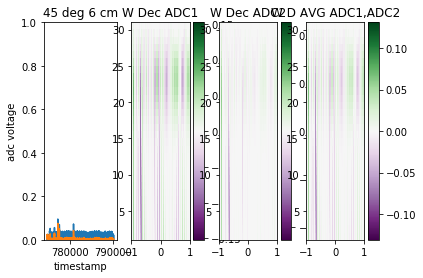

[0.06585652]


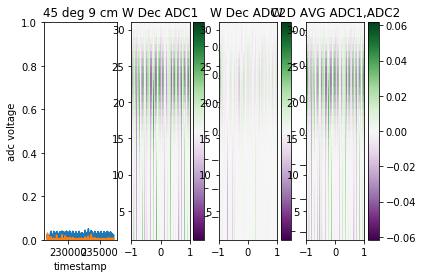

[0.08952034]


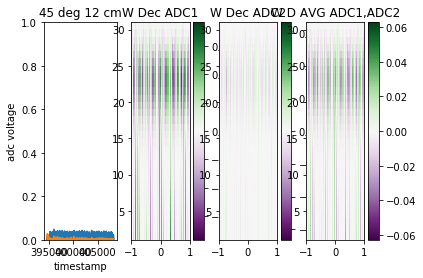

[0.08522958]


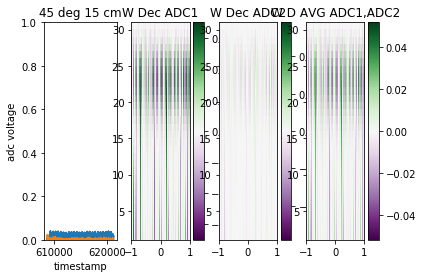

[0.06953502]


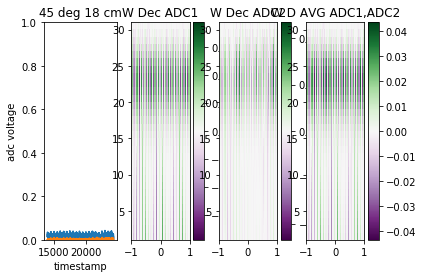

[0.07495469]


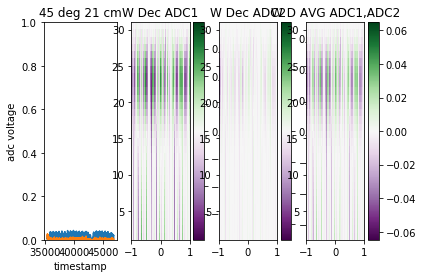

[0.08942193]


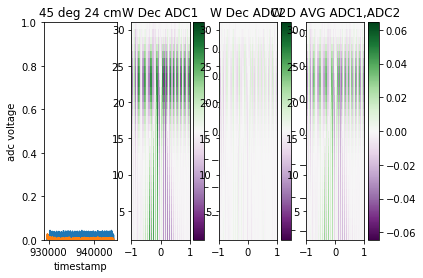

[0.10542774]


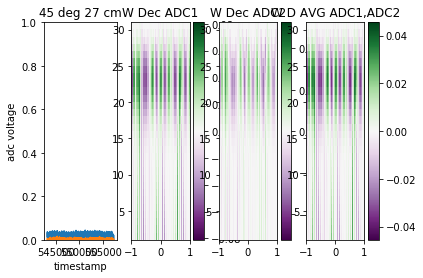

[0.08683944]


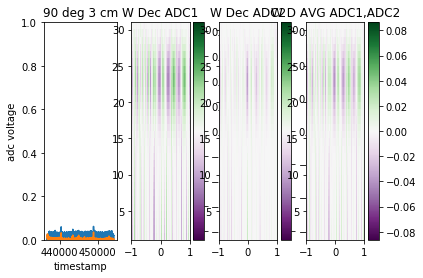

[0.18672669]


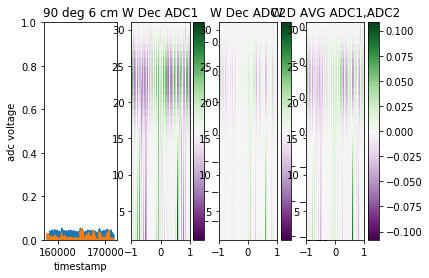

[2.21835381]


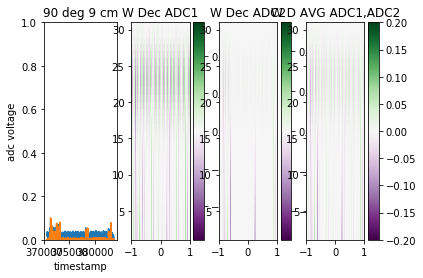

[0.1128372]


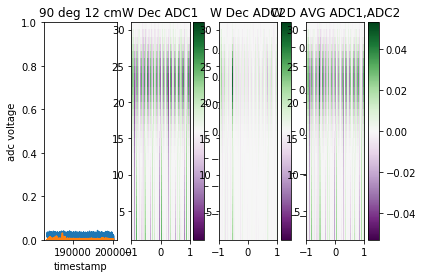

[0.08405936]


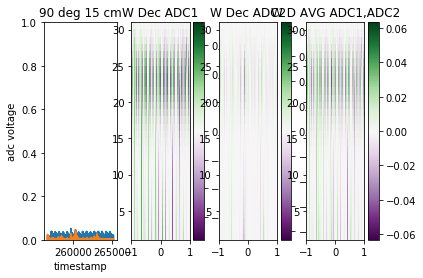

[0.05933827]


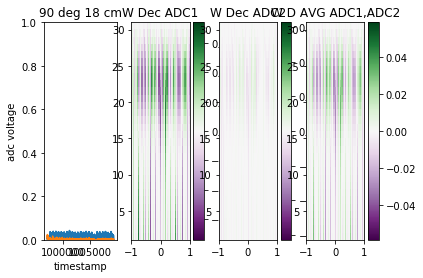

[0.0481354]


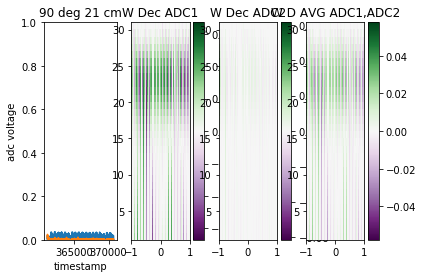

[0.02283525]


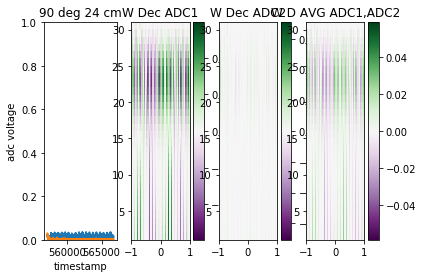

[0.02496582]


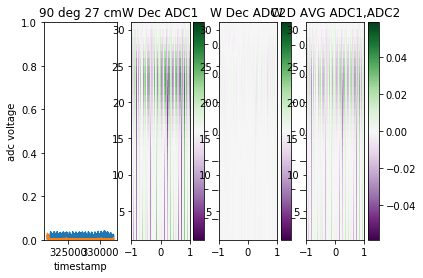

[0.01961637]


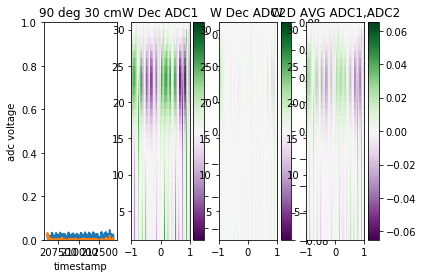

[0.06923002]


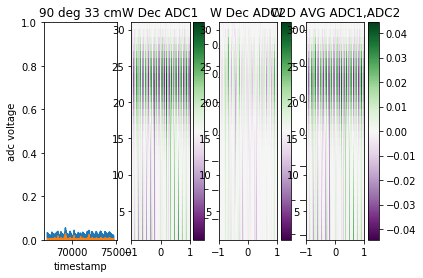

[0.06261754]


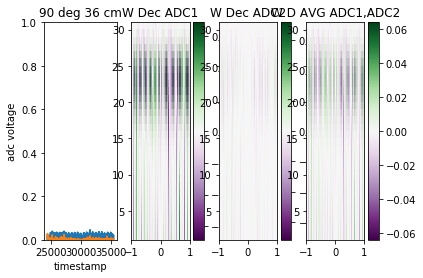

[0.19865775]


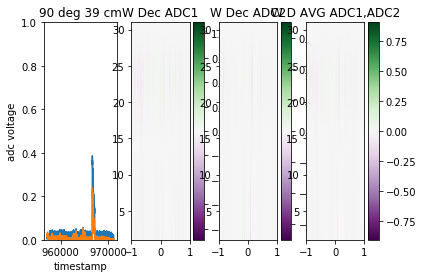

[0.70677078]


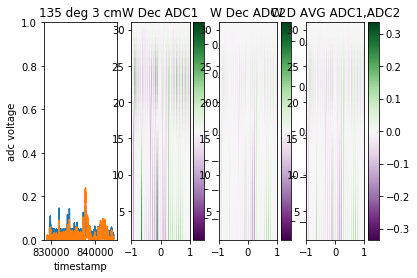

[20.84660083]


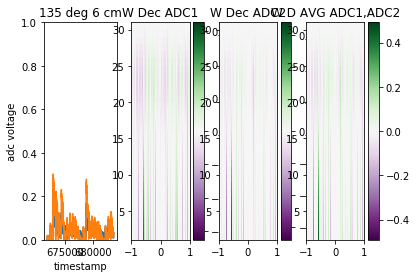

[0.33717805]


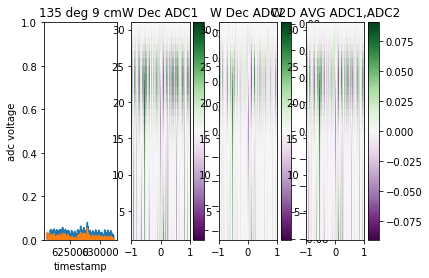

[0.33417094]


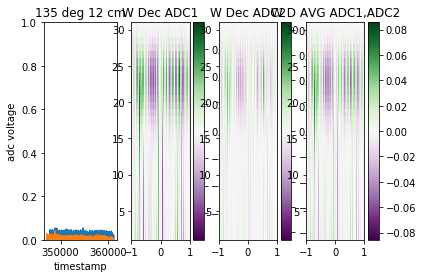

[0.26509899]


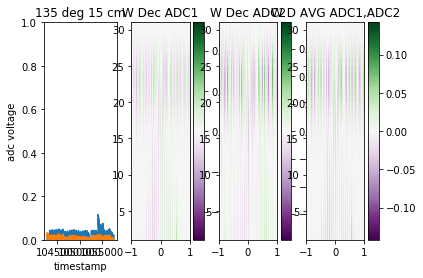

[0.28433317]


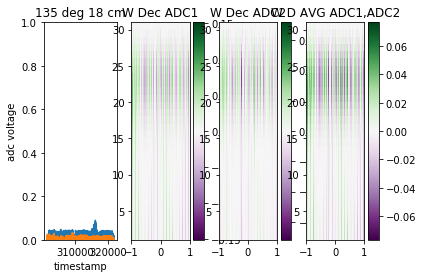

[0.17721814]


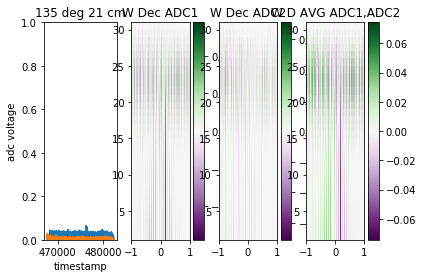

[0.14929527]


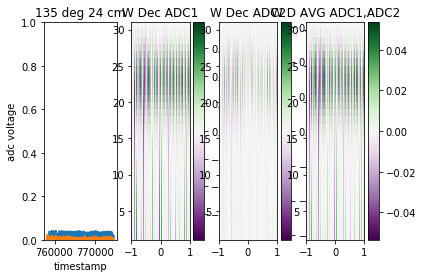

[0.15667087]


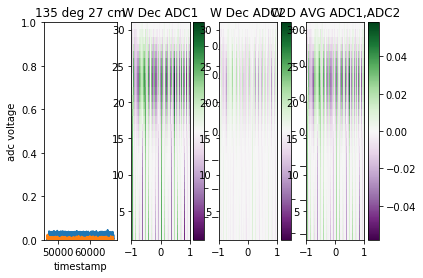

[2.00559801]


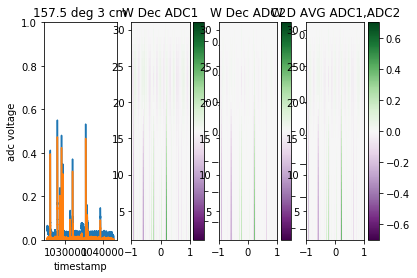

[0.53767371]


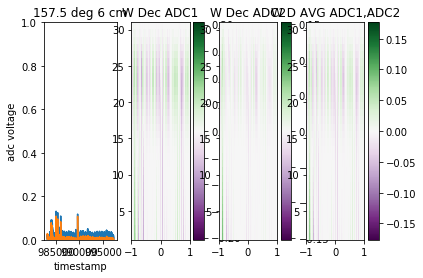

[0.24455237]


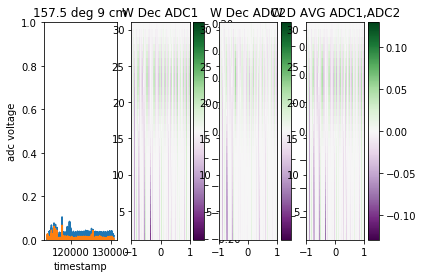

[0.19287962]


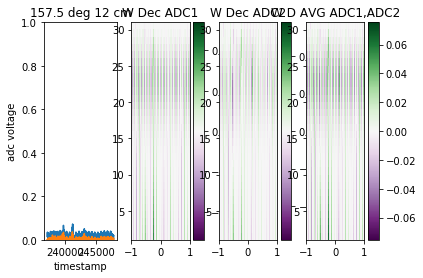

[0.15466464]


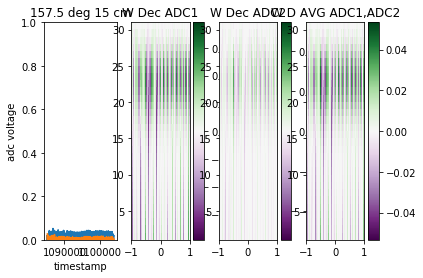

[0.14911866]


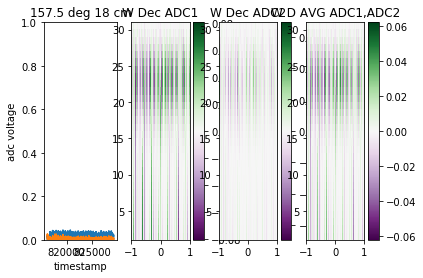

[0.19812286]


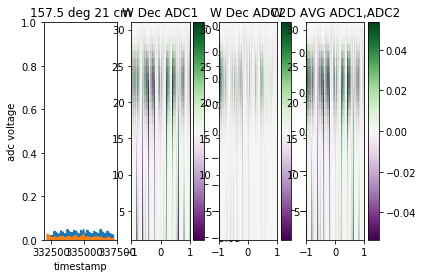

[0.16802239]


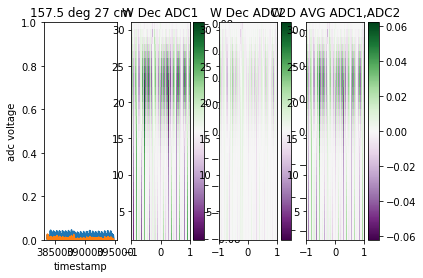

[2.73370379]


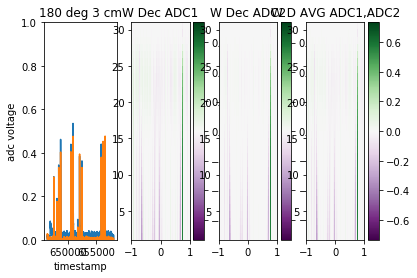

[0.34807402]


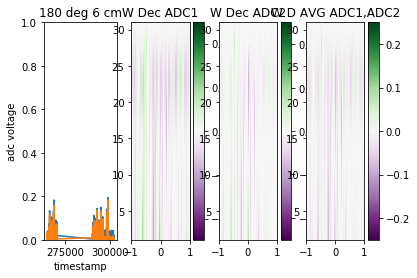

[0.3184796]


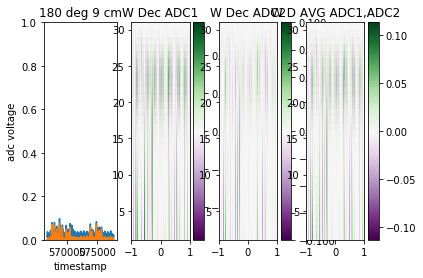

[0.19492823]


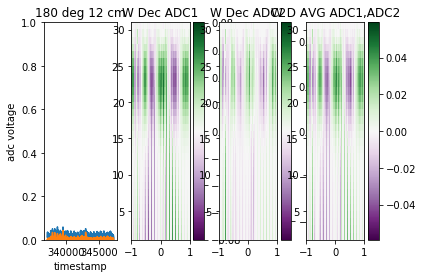

[0.18528163]


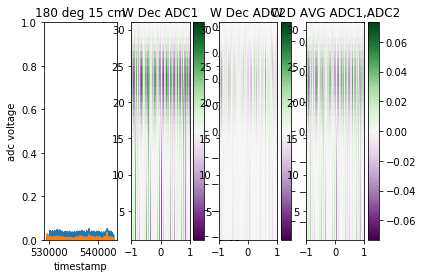

[1.93792492]


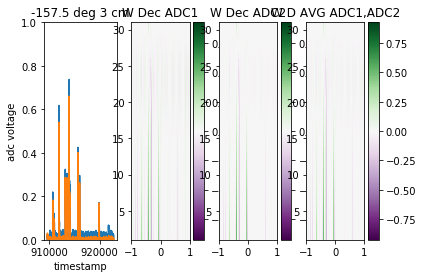

[1.93461514]


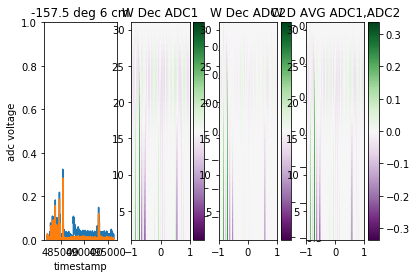

[0.3413223]


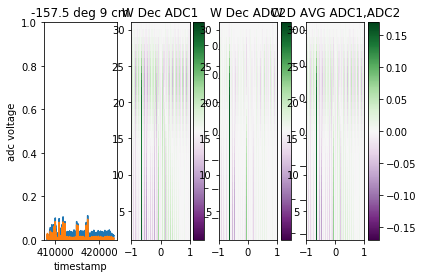

[0.21402484]


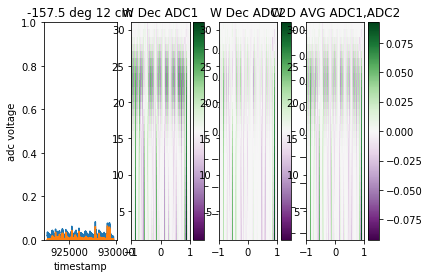

[0.16664243]


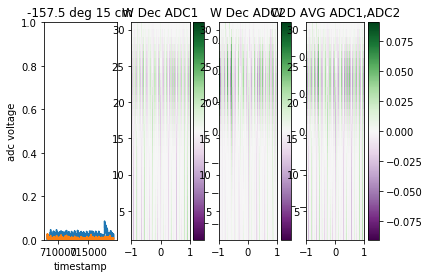

[3.27251995]


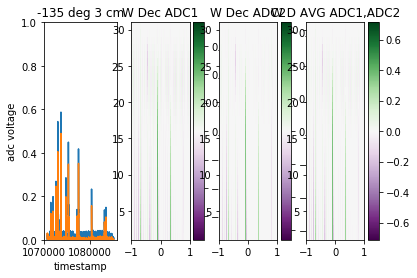

[0.40411097]


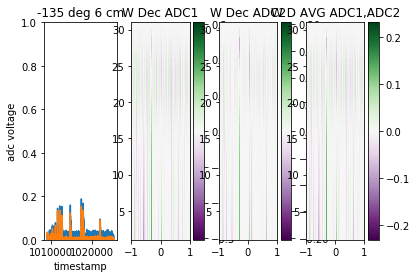

[0.20667505]


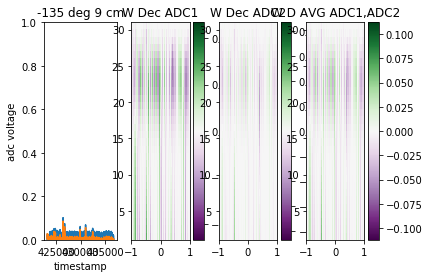

[0.29218251]


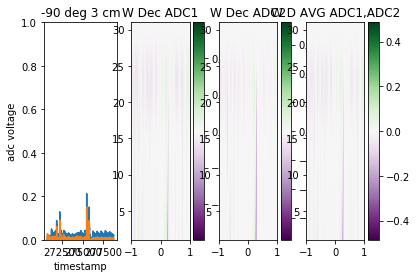

[0.22950298]


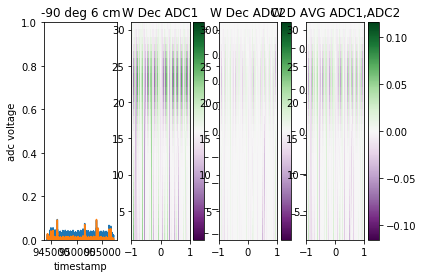

[0.33432305]


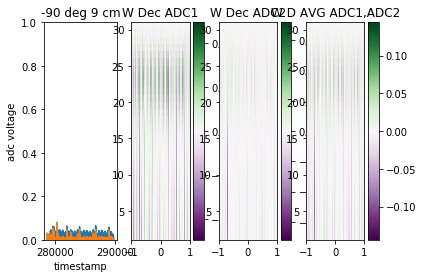

[0.27716452]


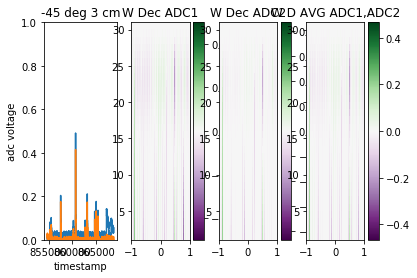

[0.42912853]


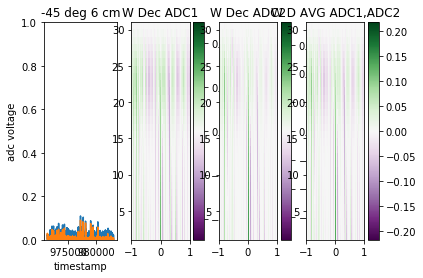

[0.34634721]


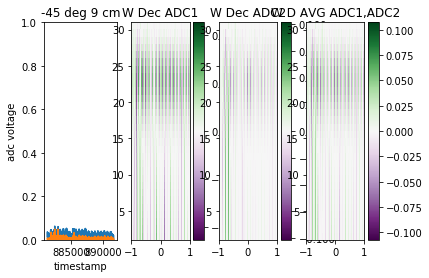

[4.48293751]


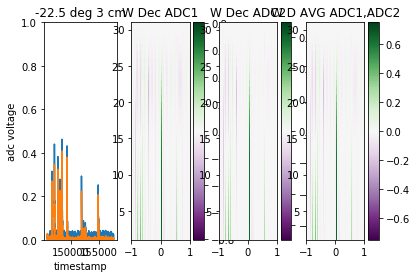

[0.50572884]


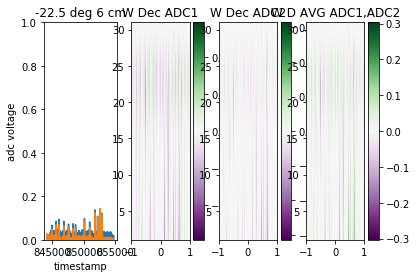

[0.34249932]


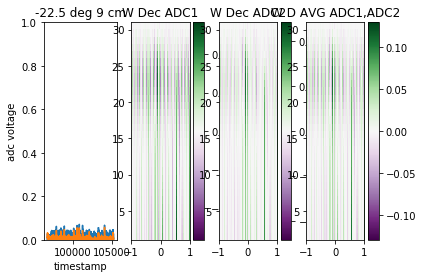

[0.32723635]


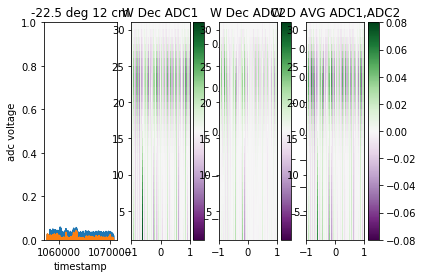

[0.3467769]


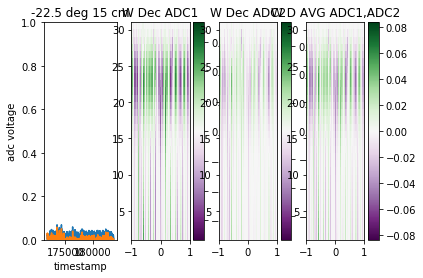

[0.28620744]


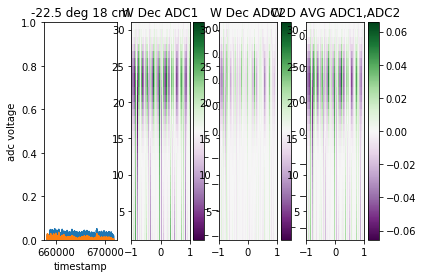

In [12]:
alldata= pd.read_csv('alldata.csv', sep=",", header= None)
zero_deg= alldata[alldata.iloc[:,2] == 0]
datas= {}


angles= [0, 22.5, 45, 90, 135, 157.5, 180, -157.5, -135, -90, -45, -22.5]

for angle in angles:
    for dist in range(0, 42, 3):
        Data = alldata[alldata.iloc[:, 2]==angle]
        Data1= Data[Data.iloc[:, 3]==dist]
        if not Data1.empty:
            datas[(angle, dist)] = Data1.iloc[:, :2]
            plt.subplot(141)
            plt.plot(datas[(angle, dist)])
            plt.xlabel('timestamp')
            plt.ylabel('adc voltage')
            plt.ylim((0, 1))
            plt.title(str(angle) + ' deg ' + str(dist) + ' cm')
            indexes = find_peaks_cwt(datas[(angle, dist)].iloc[:, 0], range(1, 31))
            peakwindow= datas[(angle, dist)].iloc[indexes[50]-1000:indexes[50]+1000, :]
  
            xcorr= np.correlate(peakwindow.values[:, 0], peakwindow.values[:, 1])
            print(xcorr)
            plt.subplot(142)
            widths =  range(1, 31)
     
            cwtmatr = signal.cwt(datas[(angle, dist)][0].values, signal.ricker, widths)
            plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
                       vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
            plt.colorbar()
            plt.title('W Dec ADC1')
            plt.subplot(143)
            cwtmatr = signal.cwt(datas[(angle, dist)][1].values, signal.ricker, widths)
            plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
                       vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
            plt.colorbar()
            plt.title('W Dec ADC2')      
            plt.subplot(144)
            cwtmatr = signal.cwt((datas[(angle, dist)][0].values+datas[(angle, dist)][1].values)/2, signal.ricker, widths)
            plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
                       vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
            plt.colorbar()
            plt.title('W D AVG ADC1,ADC2') 
           # plt.savefig(str(angle) + 'deg ' + str(dist) + 'cm'+'.png')
            plt.show()
            

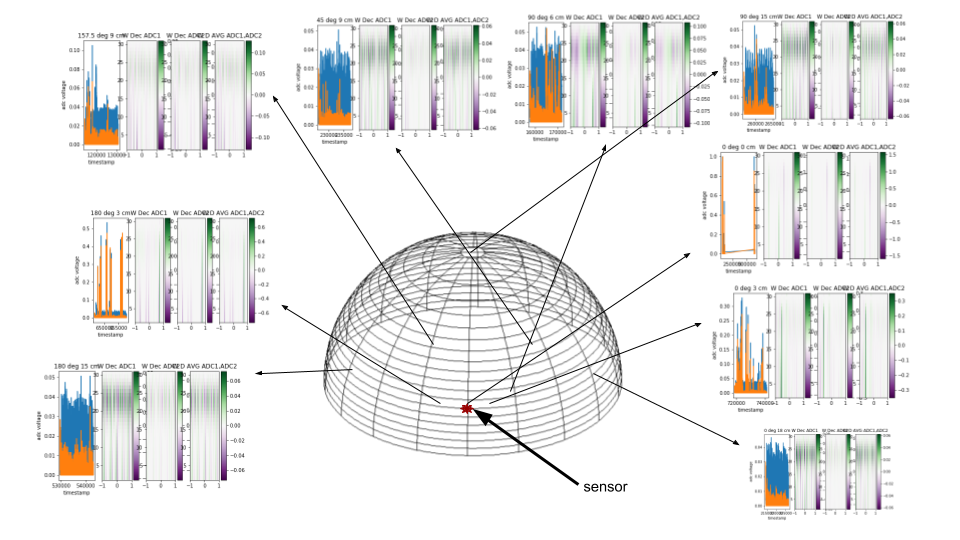

In [34]:
Image(filename='img/ballData.png', width= 1000)

**Observation:** Both the offset between the two signals in the y axis and the differences in amplitudes between when a knock occurs and when it is not occurring can be interpreted as a function of the distance and angle through a regression with two outputs. 

**TO DO:**

- Start training an MLP for regression
- Figure out send/receive from ESP
- Make esps send their estimate to the server
- Start developing paper

/home/sarahaguasvivas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sarahaguasvivas/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sarahaguasvivas/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sarahaguasvivas/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_l

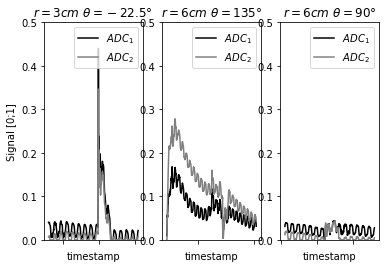

In [169]:
import matplotlib
plt.figure()
matplotlib.use('Agg')

ax= plt.subplot(1, 3, 1)
plt.plot(datas[(-22.5, 3)].iloc[1000:1500, 0], color='k', label= '${ADC_1}$')
plt.plot(datas[(-22.5, 3)].iloc[1000:1500, 1], color='gray', label= '${ADC_2}$')
plt.legend()
plt.title(r'$r= 3cm$ $\theta= -22.5\degree$')
plt.xlabel('timestamp')
plt.ylabel('Signal [0;1]')
ax.set_xticklabels([])
plt.ylim((0, 0.5))

ax= plt.subplot(1, 3, 2)
plt.plot(datas[(135, 6)].iloc[7000:7800, 0], color='k', label= '${ADC_1}$')
plt.plot(datas[(135, 6)].iloc[7000:7800, 1], color='gray', label= '${ADC_2}$')
plt.legend()
plt.title(r'$r= 6cm$ $\theta= 135\degree$')
plt.xlabel('timestamp')
#plt.ylabel('Signal [0;1]')
ax.set_xticklabels([])
plt.ylim((0, 0.5))

ax= plt.subplot(1, 3, 3)
plt.plot(datas[(90, 6)].iloc[12700:13200, 0], color='k', label= '${ADC_1}$')
plt.plot(datas[(90, 6)].iloc[12700:13200, 1], color='gray', label= '${ADC_2}$')
plt.legend()
plt.title(r'$r= 6cm$ $\theta= 90\degree$')
plt.xlabel('timestamp')
ax.set_xticklabels([])
#plt.ylabel('Signal [0;1]')
plt.ylim((0, 0.5))

plt.savefig('myfig.eps', format='eps')